In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() # set the default Seaborn style for graphics

In [2]:
# Load dataset
df = pd.read_csv('fake_job_postings.csv')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [4]:
# Null values in each variable
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [5]:
df.fillna(' ', inplace=True)

In [6]:
df.drop(columns=['job_id','salary_range','department'],inplace=True)

#### Handle Text data

In [7]:
df['text'] = df['description'] + " " + \
                      df['requirements'] + " " + \
                      df['title'] + " " + \
                      df['benefits'] + " " + \
                      df['company_profile']

In [8]:
df.head()

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,text
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0,"Food52, a fast-growing, James Beard Award-winn..."
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0,Organised - Focused - Vibrant - Awesome!Do you...
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0,"Our client, located in Houston, is actively se..."
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,THE COMPANY: ESRI – Environmental Systems Rese...
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,JOB TITLE: Itemization Review ManagerLOCATION:...


In [9]:
df1 = pd.DataFrame(df[['text', 'fraudulent']])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        17880 non-null  object
 1   fraudulent  17880 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 279.5+ KB


In [10]:
df1['text'][5]

'Job OverviewApex is an environmental consulting firm that offers stable leadership and growth and views employees as valuable resources. We are seeking a self-motivated, multi-faceted Accounts Payable Clerk to join our team in Rockville, MD and become an integral part of our continued success story.\xa0 This position entails processing high volume of invoices and working in a fast pace environment; keying and verifying various types of invoices to General Ledger accounts and job numbers submitted by vendors and company personnel; and calculating balance due to vendor by reviewing history of prior payments made to an account. Candidate must be able to answer vendor and personnel inquiries via phone or email. QualificationsThis position requires a high school diploma and 2-5 years of relevant work experience; keen attention to detail; knowledge of commonly-used concepts, practices, and procedures within the accounting field; experience with accounting software; proficiency in MS Office 

In [11]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Initialize the Porter Stemmer and stop words
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Handle concatenated words by adding spaces around punctuations
    text = re.sub(r'([^\w\s])', r' \1 ', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stop words and apply stemming
    text = ' '.join([ps.stem(word) for word in tokens if word not in stop_words])
    return text

# Apply the function to your DataFrame
df1['clean_text'] = df1['text'].apply(clean_text)


In [12]:
df1['clean_text'][5]

'job overviewapex environment consult firm offer stabl leadership growth view employe valuabl resourc seek self motiv multi facet account payabl clerk join team rockvil md becom integr part continu success stori posit entail process high volum invoic work fast pace environ key verifi variou type invoic gener ledger account job number submit vendor compani personnel calcul balanc due vendor review histori prior payment made account candid must abl answer vendor personnel inquiri via phone email qualificationsthi posit requir high school diploma year relev work experi keen attent detail knowledg commonli use concept practic procedur within account field experi account softwar profici ms offic suit includ advanc excel experi high degre profession want join team talent account profession engin manag submit resum consider today url_feffeaeeffdedbdbfebfebeeaead apexapex custom focus compani deliv environment health safeti engin servic client across unit state abroad driven entrepreneuri spir

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid = TfidfVectorizer(min_df=0, max_df=1, ngram_range=(1,3))

# transformed text
tfid_text = tfid.fit_transform(df1['clean_text'])

In [14]:
tfid_text.shape

(17880, 1646389)

#### Handle categorical variables

In [15]:
def split(location):
    l = location.split(',')
    return l[0]

df['country'] = df.location.apply(split)

df2 = pd.DataFrame(df[['telecommuting', 'has_questions', 'has_company_logo', 'employment_type', 'required_experience', 'required_education', 'function', 'industry', 'fraudulent', 'country']])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   telecommuting        17880 non-null  int64 
 1   has_questions        17880 non-null  int64 
 2   has_company_logo     17880 non-null  int64 
 3   employment_type      17880 non-null  object
 4   required_experience  17880 non-null  object
 5   required_education   17880 non-null  object
 6   function             17880 non-null  object
 7   industry             17880 non-null  object
 8   fraudulent           17880 non-null  int64 
 9   country              17880 non-null  object
dtypes: int64(4), object(6)
memory usage: 1.4+ MB


In [16]:
df2.head()

,telecommuting,has_questions,has_company_logo,employment_type,required_experience,required_education,function,industry,fraudulent,country
0,0,0,1,Other,Internship,,Marketing,,0,US
1,0,0,1,Full-time,Not Applicable,,Customer Service,Marketing and Advertising,0,NZ
2,0,0,1,,,,,,0,US
3,0,0,1,Full-time,Mid-Senior level,Bachelor's Degree,Sales,Computer Software,0,US
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Health Care Provider,Hospital & Health Care,0,US


In [17]:
cols_to_convert = ['telecommuting', 'has_questions', 'has_company_logo', 'employment_type', 'required_experience', 'required_education', 'function', 'industry', 'country']

for col in cols_to_convert:
    df2[col] = pd.Categorical(df2[col])

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   telecommuting        17880 non-null  category
 1   has_questions        17880 non-null  category
 2   has_company_logo     17880 non-null  category
 3   employment_type      17880 non-null  category
 4   required_experience  17880 non-null  category
 5   required_education   17880 non-null  category
 6   function             17880 non-null  category
 7   industry             17880 non-null  category
 8   fraudulent           17880 non-null  int64   
 9   country              17880 non-null  category
dtypes: category(9), int64(1)
memory usage: 325.2 KB


In [18]:
# One-hot encoding
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
transformed = ohe.fit_transform(df2[['telecommuting', 'has_questions', 'has_company_logo', 'employment_type', 'required_experience', 'required_education', 'function', 'industry', 'country']])
transformed.toarray()

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [19]:
ohe.categories_

[array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([' ', 'Contract', 'Full-time', 'Other', 'Part-time', 'Temporary'],
       dtype=object),
 array([' ', 'Associate', 'Director', 'Entry level', 'Executive',
        'Internship', 'Mid-Senior level', 'Not Applicable'], dtype=object),
 array([' ', 'Associate Degree', "Bachelor's Degree", 'Certification',
        'Doctorate', 'High School or equivalent', "Master's Degree",
        'Professional', 'Some College Coursework Completed',
        'Some High School Coursework', 'Unspecified', 'Vocational',
        'Vocational - Degree', 'Vocational - HS Diploma'], dtype=object),
 array([' ', 'Accounting/Auditing', 'Administrative', 'Advertising',
        'Art/Creative', 'Business Analyst', 'Business Development',
        'Consulting', 'Customer Service', 'Data Analyst', 'Design',
        'Distribution', 'Education', 'Engineering', 'Finance',
        'Financial Analyst', 'General Business', 'Health Care Pr

In [20]:
from scipy.sparse import hstack

concatenated_features = hstack([tfid_text, transformed])

In [24]:
y = pd.DataFrame(df1["fraudulent"]) # Response
X = concatenated_features

# For undersampling
from imblearn.under_sampling import NearMiss

# Handle Data Imbalance
nm = NearMiss()
X_resampled, y_resampled = nm.fit_resample(X, y)

from sklearn.model_selection import train_test_split
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2)

# Initialize the XGBoost classifier
xgbclf = xgb.XGBClassifier()

# Fit the model
xgbclf.fit(X_train, y_train.values.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [25]:
# Predict Response corresponding to Predictors
y_train_pred = xgbclf.predict(X_train)
y_test_pred = xgbclf.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", xgbclf.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", xgbclf.score(X_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9010830324909748

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9193083573487032



<AxesSubplot:>

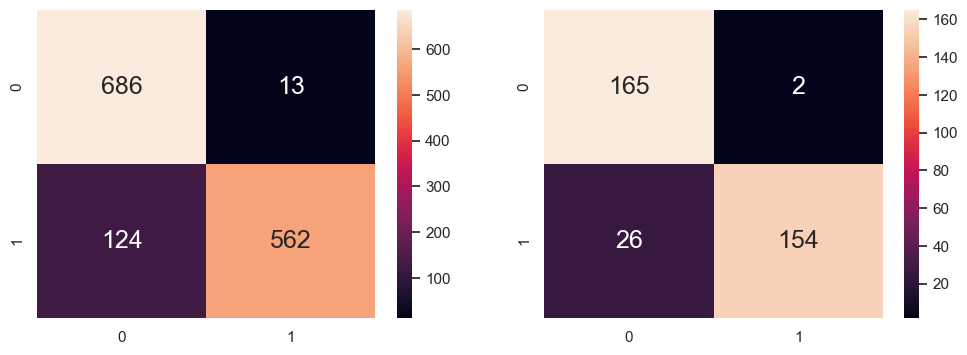

In [26]:
from sklearn.metrics import confusion_matrix

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [27]:
# Initialize the XGBoost classifier
xgbclf2 = xgb.XGBClassifier()

# Fit the model
xgbclf2.fit(X_train, y_train.values.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [28]:
# Predict Response corresponding to Predictors
y_train_pred = xgbclf2.predict(X_train)
y_test_pred = xgbclf2.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", xgbclf2.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", xgbclf2.score(X_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9010830324909748

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9193083573487032



<AxesSubplot:>

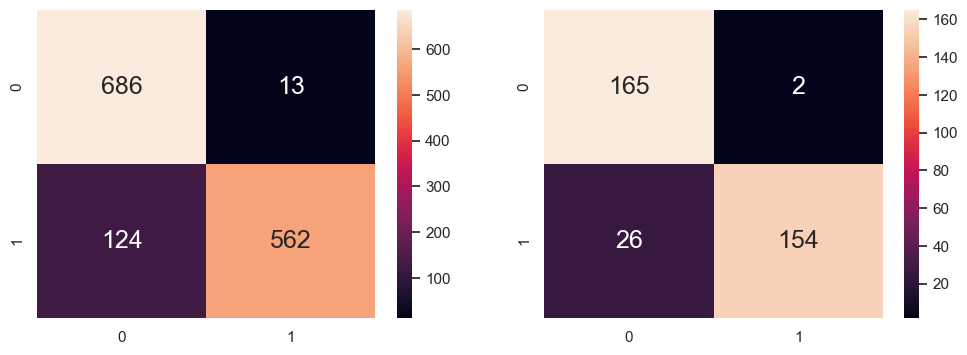

In [29]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       167
           1       0.99      0.86      0.92       180

    accuracy                           0.92       347
   macro avg       0.93      0.92      0.92       347
weighted avg       0.93      0.92      0.92       347

